In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Car_Prices_Poland_Kaggle.csv', index_col=0)

In [3]:
df.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [4]:
df_grouped_by_province = df.groupby('province')['city'].count().sort_values(ascending=False)

In [5]:
df_grouped_by_province

province
Mazowieckie                 22219
Śląskie                     16706
Wielkopolskie               14016
Małopolskie                  9756
Dolnośląskie                 8838
Łódzkie                      7884
Pomorskie                    7605
Kujawsko-pomorskie           5371
Lubelskie                    4740
Zachodniopomorskie           3963
Podkarpackie                 3553
Świętokrzyskie               3337
Warmińsko-mazurskie          2956
Lubuskie                     2743
Podlaskie                    2123
Opolskie                     2073
Moravian-Silesian Region       35
Berlin                          3
Wiedeń                          2
Trenczyn                        1
Nordrhein-Westfalen             1
Niedersachsen                   1
(                               1
Name: city, dtype: int64

In [6]:
dff = df.groupby(['province', 'year'])['year'].size()

In [7]:
print(dff.to_string())

province                  year
(                         2014       1
Berlin                    2010       2
                          2014       1
Dolnośląskie              1965       2
                          1970       1
                          1972       1
                          1983       1
                          1985       1
                          1986       1
                          1987       1
                          1990       4
                          1991       1
                          1992       5
                          1993       4
                          1994       4
                          1995       5
                          1996       8
                          1997      21
                          1998      36
                          1999      38
                          2000      57
                          2001      85
                          2002     112
                          2003     177
                          2004   

In [8]:
dff


province        year
(               2014      1
Berlin          2010      2
                2014      1
Dolnośląskie    1965      2
                1970      1
                       ... 
Świętokrzyskie  2018    152
                2019     73
                2020     67
                2021    145
                2022     12
Name: year, Length: 568, dtype: int64

In [9]:
type(dff)

pandas.core.series.Series

In [10]:
dff.index

MultiIndex([(             '(', 2014),
            (        'Berlin', 2010),
            (        'Berlin', 2014),
            (  'Dolnośląskie', 1965),
            (  'Dolnośląskie', 1970),
            (  'Dolnośląskie', 1972),
            (  'Dolnośląskie', 1983),
            (  'Dolnośląskie', 1985),
            (  'Dolnośląskie', 1986),
            (  'Dolnośląskie', 1987),
            ...
            ('Świętokrzyskie', 2013),
            ('Świętokrzyskie', 2014),
            ('Świętokrzyskie', 2015),
            ('Świętokrzyskie', 2016),
            ('Świętokrzyskie', 2017),
            ('Świętokrzyskie', 2018),
            ('Świętokrzyskie', 2019),
            ('Świętokrzyskie', 2020),
            ('Świętokrzyskie', 2021),
            ('Świętokrzyskie', 2022)],
           names=['province', 'year'], length=568)

In [11]:
dff.iloc[0]

1

In [12]:
statistics = df.groupby(['province'])[['year']].aggregate([min, max, 'mean']).round(1)

In [13]:
li = []
for i in dff.index:
    if 'Łódzkie' in i:
        li.append(True)
    else:
        li.append(False)
        
res_lodzkie = dff[li]
res_lodzkie

province  year
Łódzkie   1965      1
          1966      1
          1967      1
          1973      1
          1991      3
          1992      1
          1993      3
          1994      2
          1995      3
          1996      9
          1997      8
          1998     20
          1999     23
          2000     28
          2001     39
          2002     74
          2003    106
          2004    151
          2005    210
          2006    321
          2007    429
          2008    432
          2009    437
          2010    403
          2011    452
          2012    394
          2013    346
          2014    366
          2015    329
          2016    400
          2017    554
          2018    546
          2019    301
          2020    222
          2021    929
          2022    339
Name: year, dtype: int64

In [14]:
import re

years = re.findall(r"\d{4}", str(res_lodzkie.index))
# years

<BarContainer object of 36 artists>

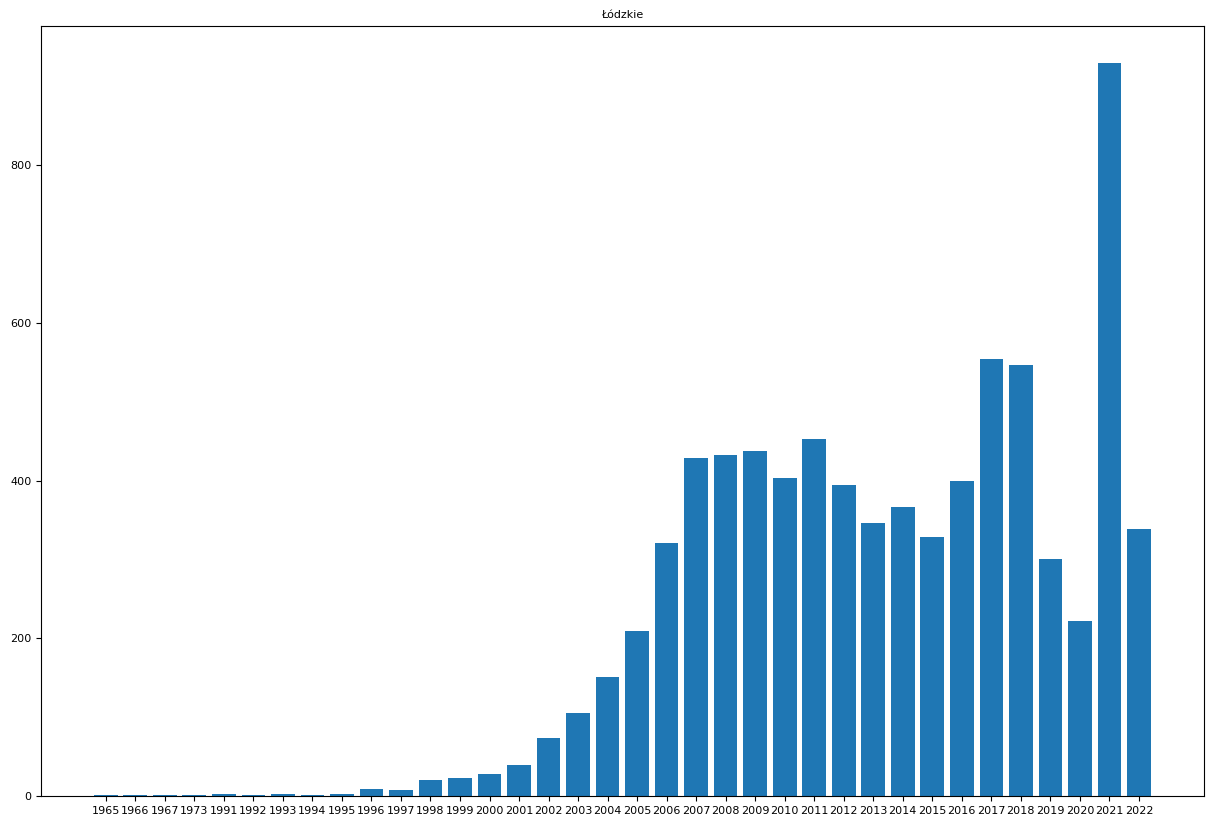

In [15]:
plt.figure(figsize=(15,10))

SIZE = 8
plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.title('Łódzkie')
 
plt.bar(years, res_lodzkie.values)

In [16]:
statistics

year              
                           min   max    mean
province                                    
(                         2014  2014  2014.0
Berlin                    2010  2014  2011.3
Dolnośląskie              1965  2022  2012.5
Kujawsko-pomorskie        1965  2022  2012.9
Lubelskie                 1966  2022  2011.3
Lubuskie                  1973  2022  2012.1
Mazowieckie               1964  2022  2013.2
Małopolskie               1966  2022  2013.0
Moravian-Silesian Region  2016  2019  2017.7
Niedersachsen             2018  2018  2018.0
Nordrhein-Westfalen       2014  2014  2014.0
Opolskie                  1965  2022  2013.1
Podkarpackie              1970  2022  2012.2
Podlaskie                 1970  2022  2012.8
Pomorskie                 1966  2022  2013.6
Trenczyn                  2020  2020  2020.0
Warmińsko-mazurskie       1990  2022  2011.9
Wiedeń                    2009  2009  2009.0
Wielkopolskie             1966  2022  2012.8
Zachodniopomorskie        1952  2022  2012.0
Łódzkie                   1965  2022  2013.3
Śląskie                   1969  2022  2013.9
Świętokrzyskie            1945  2022  2011.0

In [17]:
print(statistics.to_string())

                          year              
                           min   max    mean
province                                    
(                         2014  2014  2014.0
Berlin                    2010  2014  2011.3
Dolnośląskie              1965  2022  2012.5
Kujawsko-pomorskie        1965  2022  2012.9
Lubelskie                 1966  2022  2011.3
Lubuskie                  1973  2022  2012.1
Mazowieckie               1964  2022  2013.2
Małopolskie               1966  2022  2013.0
Moravian-Silesian Region  2016  2019  2017.7
Niedersachsen             2018  2018  2018.0
Nordrhein-Westfalen       2014  2014  2014.0
Opolskie                  1965  2022  2013.1
Podkarpackie              1970  2022  2012.2
Podlaskie                 1970  2022  2012.8
Pomorskie                 1966  2022  2013.6
Trenczyn                  2020  2020  2020.0
Warmińsko-mazurskie       1990  2022  2011.9
Wiedeń                    2009  2009  2009.0
Wielkopolskie             1966  2022  2012.8
Zachodniop